## Tải thư viện cần thiết.

In [2]:
%pip install matplotlib pandas numpy seaborn wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 7.4 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


## Thông tin sơ lược.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Đọc file csv sau khi lưu, bao gồm 100 post.
raw_df = pd.read_csv('Data/hotwheels.csv')
len(raw_df)

100

In [18]:
# Thông tin về dữ liệu của dataframe.
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        100 non-null    int64  
 1   text                           100 non-null    object 
 2   post_text                      67 non-null     object 
 3   shared_text                    33 non-null     object 
 4   original_text                  0 non-null      float64
 5   time                           100 non-null    object 
 6   timestamp                      100 non-null    int64  
 7   image                          25 non-null     object 
 8   image_lowquality               100 non-null    object 
 9   images                         100 non-null    object 
 10  images_description             100 non-null    object 
 11  images_lowquality              100 non-null    object 
 12  images_lowquality_description  100 non-null    obje

In [33]:
# Lượt tương tác (reactions, comments và shares) của bài viết gần nhất.
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

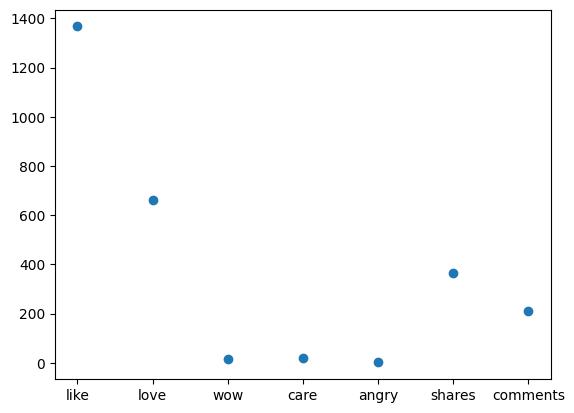

In [80]:
x = reactions.keys()
y = reactions.values()
plt.scatter(x,y)

Tương tác của bài viết đầu tiên chủ yếu là "like" và "love"

In [34]:
# Số reactions của mỗi bài viết.
y = raw_df[['post_id', 'text', 'reactions', 'reaction_count']]
y

,post_id,text,reactions,reaction_count
0,663497495969085,Only ten cars remain but only one car will tak...,"{'like': 1367, 'love': 661, 'wow': 15, 'care':...",2065
1,662533809398787,"Challengers, let’s race full speed ahead this ...",{'like': 9},9
2,662301126088722,Tune in this Saturday for the Hot Wheels Legen...,"{'like': 219, 'love': 58, 'wow': 1, 'care': 4}",282
3,661756316143203,This Saturday marks the sixth Hot Wheels Legen...,"{'like': 1133, 'love': 496, 'haha': 1, 'wow': ...",1670
4,1276112246404579,Join us for the Semi-Finals of the Hot Wheels ...,"{'like': 249, 'love': 81, 'haha': 1, 'wow': 2,...",335
...,...,...,...,...
95,130770646693712,"SUN, SEP 11\nHot Wheels Monster Trucks Live!",NaN,19
96,998235587977759,"SUN, SEP 4\nHot Wheels Monster Trucks Live!",NaN,20
97,300656448999300,"SUN, SEP 4\nHot Wheels Monster Trucks Live!",NaN,32
98,600244618961040,"Join Hot Wheels, NBC, Rutledge Wood and Dalal ...",NaN,1000


## =====================================================================================================

## Bài viết có số reactions lớn nhất và bé nhất.

In [64]:
# Bài viết có số reactions lớn nhất của trong 100 bài crawl về - 9500 reactions.

highest_reaction_count = max(raw_df['reaction_count'])
post1 = raw_df[raw_df['reaction_count'] == highest_reaction_count]
post1[['post_id', 'post_text', 'time', 'reaction_count', 'was_live', 'video_id']]

,post_id,post_text,time,reaction_count,was_live,video_id
45,636367022015466,"Phoenix's creative garage spirit shines! 🏁🔥 Check out some of the best custom cars and moments from today, where passion met creativity in the desert sun! ☀️🚗 #HotWheelsLegends",2023-09-23 23:30:25,9500,False,3.396527e+14


In [60]:
# Bài viết có số reactions thấp nhất trong 100 bài crawl về - 9 reactions.

lowest_reaction_count = min(raw_df['reaction_count'])
post2 = raw_df[raw_df['reaction_count'] == lowest_reaction_count]
post2[['post_id', 'post_text', 'time', 'reaction_count', 'was_live']]

,post_id,post_text,time,reaction_count,was_live
1,662533809398787,"Challengers, let’s race full speed ahead this 11 Nov! ENJOY UP TO 70% OFF with Shopee 11.11 Big Sale & Lazada’s 11.11 Biggest Sale of The Year!\n\n🗓️ BEST DEALS ONLY on 11.11 🗓️\n🤩 UP TO 70% OFF\n🤩 Shopee : EXTRA UP TO $26 OFF Voucher*\n🤩 Lazada : EXTRA UP TO $22 OFF Voucher*\n*T&Cs apply.\n\n💡🎁GIFT-WITH-PURCHASE AWAITS EACH STORE💡\n🧡Shopee: FREE 1x Thomas Storage Box with min. purchase of $60 & above on any products.\n💙Lazada: FREE 1x Hot Wheels Limited Edition Drawstring Bag with min. purchase of $40 & above on any products.\n\n🚗🏎️💨 Shop & build tracks, zoom, flip, stunt, crash… all the way with Hot Wheels City, Monster Trucks, and more!🔥\n\n🎁Don't miss out, add-to-cart the most exciting 11.11 deals now while stocks last!⏰\n\nSHOP NOW at\n🧡https://bit.ly/MattelStore_ShopeeSG\n💙https://bit.ly/MattelStore_LazadaSG\n\n#ShopeeSG #Shopee1111BigSale #Lazada1111 #LazadaSG #MattelSG",2023-11-08 06:00:47,9,False


In [63]:
# Số reactions trung bình của 100 bài.

average_reaction_count = raw_df['reaction_count'].mean()
average_reaction_count

707.65

In [61]:
# Thời gian của hai bài đăng trên.

print(post1['time']) 
print(post2['time'])


45    2023-09-23 23:30:25
Name: time, dtype: object
1    2023-11-08 06:00:47
Name: time, dtype: object


Như ta có thể thấy trong 3 cells ở trên, có sự khác biệt rất lớn giữa số reactions lớn nhất, nhỏ nhất và bình quân. Ta thấy rằng sự tương tác không đồng đều, có thể kết luận một phần là do thị hiếu người dùng, xu hướng tương tác, và do thời gian đăng bài. 

Tính theo múi giờ VN, bài nhiều reations nhất được đăng lúc 23h30 tối, quy đổi ra múi giờ bình quân bên Mĩ là 11h30 trưa - là ban ngày và giờ nghỉ trưa nên nhiều người sẽ thấy được bài viết. Ngược lại, bài viết ít reactions nhất được đăng lúc 6h00 phút sáng, tức là khoảng 6h00 tối bên Mĩ - là thời gian mọi thứ trở nên bận bịu hơn (tan làm, nấu bữa tối, trông con, đón con, tham gia giao thông,...) nên số reactions sẽ giảm mạnh. 


Ta cùng xem kĩ hơn về nội dung bài post:

In [84]:
# Lấy ra nội dung bài đăng nhiều reactions nhất.

content1 = post1['post_text']
pd.set_option('display.max_colwidth', None)
content1

45    Phoenix's creative garage spirit shines! 🏁🔥 Check out some of the best custom cars and moments from today, where passion met creativity in the desert sun! ☀️🚗 #HotWheelsLegends
Name: post_text, dtype: object

In [85]:
# Lấy ra nội dung bài đăng ít reactions nhất.

content2 = post2['post_text']
pd.set_option('display.max_colwidth', None)
content2

1    Challengers, let’s race full speed ahead this 11 Nov! ENJOY UP TO 70% OFF with Shopee 11.11 Big Sale & Lazada’s 11.11 Biggest Sale of The Year!\n\n🗓️ BEST DEALS ONLY on 11.11 🗓️\n🤩 UP TO 70% OFF\n🤩 Shopee : EXTRA UP TO $26 OFF Voucher*\n🤩 Lazada : EXTRA UP TO $22 OFF Voucher*\n*T&Cs apply.\n\n💡🎁GIFT-WITH-PURCHASE AWAITS EACH STORE💡\n🧡Shopee: FREE 1x Thomas Storage Box with min. purchase of $60 & above on any products.\n💙Lazada: FREE 1x Hot Wheels Limited Edition Drawstring Bag with min. purchase of $40 & above on any products.\n\n🚗🏎️💨 Shop & build tracks, zoom, flip, stunt, crash… all the way with Hot Wheels City, Monster Trucks, and more!🔥\n\n🎁Don't miss out, add-to-cart the most exciting 11.11 deals now while stocks last!⏰\n\nSHOP NOW at\n🧡https://bit.ly/MattelStore_ShopeeSG\n💙https://bit.ly/MattelStore_LazadaSG\n\n#ShopeeSG #Shopee1111BigSale #Lazada1111 #LazadaSG #MattelSG
Name: post_text, dtype: object

(Lập luận này chỉ dựa trên suy luận, phân tích và ý kiến cá nhân).

Post có nhiều reactions nhất là một video recap lại sự kiện độ xe quy mô toàn nước Mĩ (Hotwheels Legends Tour), được tổ chức bởi công ty Mattel, nhằm chọn ra những mẫu mã được yêu thích nhất để làm thành mô hình tỷ lệ 1:64. Video được đầu tư chỉn chu và bao gồm nhiều chiếc xe đẹp, góp phần đẩy mạnh tương tác. Hơn nữa, sự kiện chỉ diễn ra tại Mĩ, nhưng đồ chơi Mattel lại được yêu thích toàn cầu. Vì lý do đó, để lại reactions cũng là một cách để người theo dõi từ xa bày tỏ sự yêu thích tới những chiếc xe và sự kiện.

Trong khi đó, post ít reations nhất lại là một tin quảng bá ngày sale, khuyến mại trên Shopee và Lazada. Thông thường bài viết này chỉ được đăng với mục đích thông tin, chứ không phải để thu tương tác nên không được đầu tư quá kĩ lưỡng. Vì vậy, có ít reactions là điều có thể suy ra được.

## =====================================================================================================================================================

## Sự biến động của lượng reactions theo dòng thời gian.

In [14]:
# Lấy ra dataframe check gồm 3 cột time, timestamp và reaction_count để thống kê, và đảo lại dataframe do check được xếp từ thời điểm gần nhất tới xa nhất (để khi vẽ biểu đồ sẽ thuận nhìn và logic hơn).
check = raw_df[['time', 'timestamp', 'reaction_count']].iloc[::-1]

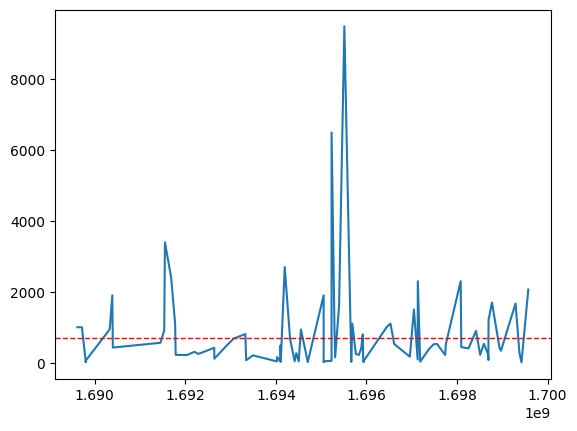

In [82]:
# biểu đồ thể hiện hiệu xuất react của các bài đăng theo thời gian từ qúa khứ đến hiện tại
dates = check['timestamp']
y = check['reaction_count']
plt.plot(dates,y)
plt.axhline(y=np.nanmean(y), color = 'red', linestyle = '--', linewidth = 1, label = 'avg')


Như ta có thể thấy trong biểu đồ đường ở trên, fanpage của "Hotwheels" có lượt số tương tác không ổn định theo thời gian, với nhiều những điểm nhọn (spikes) phân bố không đồng đều. Lượng reaction thấp nhất được ghi nhận là 9, và cao nhất là 9500, với điểm nhọn nổi bật nằm giữa timestamp 1.694 và 1.696. Lượng react trung bình trên trục thời gian giới hạn là ~ 707 reacts, được biểu diễn bằng đường nét đứt màu đỏ.

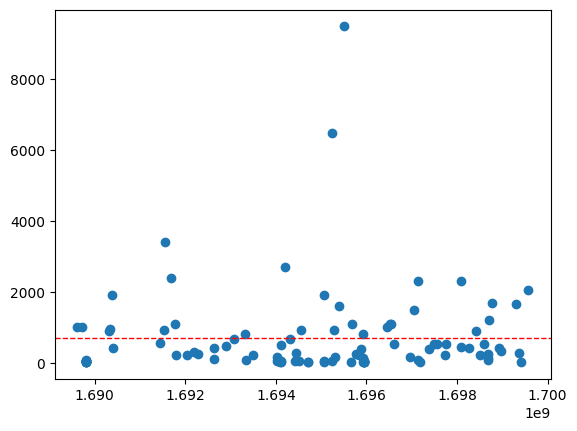

In [83]:
plt.scatter(dates,y)
plt.axhline(y=np.nanmean(y), color = 'red', linestyle = '--', linewidth = 1, label = 'avg')

Đổi qua biểu đồ phân tán, ta thấy khá nhiều bài viết có số reactions nằm dưới mức bình quân, một số nhỏ hơn bài viết trên trung bình, và ít bài viết xấp xỉ bình quân.